In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import pickle 
warnings.filterwarnings("ignore")
data = pd.read_csv("dropout-trabalho2.csv")

# Exploratory Data Analysis

In [2]:
#data['Program']=data['Program'].astype('category')
#data['Id']=data['Id'].astype('object')

In [3]:
data['Y0s1_enrol']

0       33.0
1       30.0
2       24.0
3       33.0
4       30.0
        ... 
2105    10.0
2106    35.0
2107    41.0
2108    36.0
2109    35.0
Name: Y0s1_enrol, Length: 2110, dtype: float64

In [4]:
data.isna().sum()# logo não existem NA's

Id               0
Program          0
Y0s1_enrol       0
Y0s2_enrol       0
Y1s1_enrol       0
Y1s1_complete    0
Y1s1_grade       0
Y1s2_enrol       0
Y1s2_complete    0
Y1s2_grade       0
Y2s1_enrol       0
Y2s1_complete    0
Y2s1_grade       0
Y2s2_enrol       0
Y2s2_complete    0
Y2s2_grade       0
Y3s1_enrol       0
Y3s1_complete    0
Y3s1_grade       0
Y3s2_enrol       0
Y3s2_complete    0
Y3s2_grade       0
Y4s1_enrol       0
Y4s1_complete    0
Y4s1_grade       0
Y4s2_enrol       0
Y4s2_complete    0
Y4s2_grade       0
Rest_enrol       0
Rest_complete    0
Rest_grade       0
Failure          0
dtype: int64

In [5]:
data.describe()

,Id,Program,Y0s1_enrol,Y0s2_enrol,Y1s1_enrol,Y1s1_complete,Y1s1_grade,Y1s2_enrol,Y1s2_complete,Y1s2_grade,...,Y4s1_enrol,Y4s1_complete,Y4s1_grade,Y4s2_enrol,Y4s2_complete,Y4s2_grade,Rest_enrol,Rest_complete,Rest_grade,Failure
count,2.110000e+03,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,...,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000
mean,1.288536e+08,1.733175,27.040047,28.938863,25.399052,18.560664,10.392925,27.689573,19.906161,10.767200,...,6.496682,3.171564,2.260109,7.133649,3.384834,2.198823,11.720142,3.326540,0.970491,0.275829
std,6.663121e+06,1.102774,10.837147,13.665683,13.331220,13.091278,6.164561,14.229294,13.413102,6.284379,...,13.318561,7.836959,4.877508,14.911392,8.302442,4.836866,49.871917,14.553754,3.358431,0.447037
min,1.113357e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.313825e+08,1.000000,24.000000,24.000000,23.000000,2.000000,10.000000,27.000000,6.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.313868e+08,2.000000,30.000000,30.000000,30.000000,23.500000,12.696000,30.000000,24.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.313925e+08,3.000000,33.000000,36.000000,34.000000,30.000000,14.747250,36.000000,30.000000,15.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.314154e+08,3.000000,66.000000,93.000000,90.000000,90.000000,18.174000,90.000000,90.000000,19.400000,...,80.000000,36.000000,18.000000,83.000000,59.000000,17.185000,623.500000,159.000000,19.000000,1.000000


In [6]:
colunas=['Y0s1_enrol', 'Y0s2_enrol', 'Y1s1_enrol', 'Y1s1_complete', 'Y1s2_enrol', 'Y1s2_complete', 'Y2s1_enrol', 'Y2s1_complete', 'Y2s2_enrol', 'Y2s2_complete', 'Y3s1_enrol', 'Y3s1_complete', 'Y3s2_enrol', 'Y3s2_complete', 'Y4s1_enrol', 'Y4s1_complete', 'Y4s2_enrol', 'Y4s2_complete']

In [7]:
dados_toplot=data.copy()
dados2=data.copy()

Y0s1_enrol


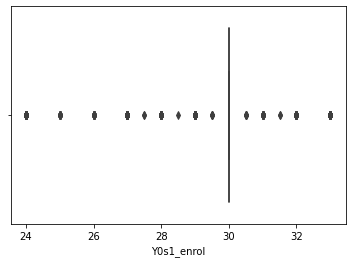

Y0s2_enrol


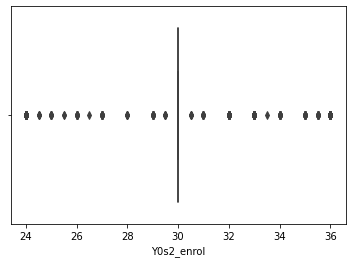

Y1s1_enrol


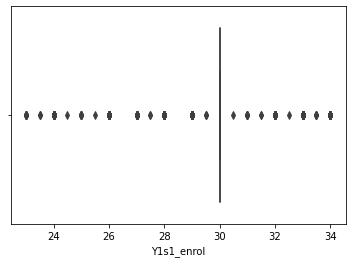

Y1s1_complete


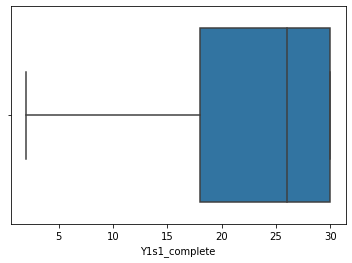

Y1s2_enrol


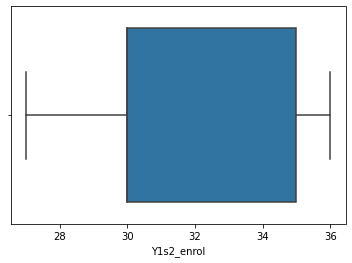

Y1s2_complete


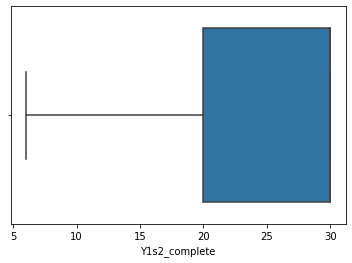

Y2s1_enrol


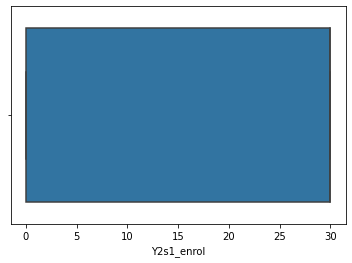

Y2s1_complete


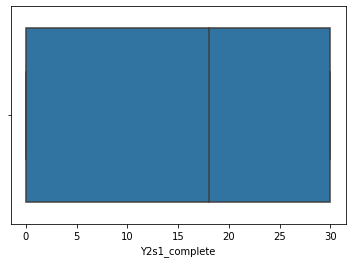

Y2s2_enrol


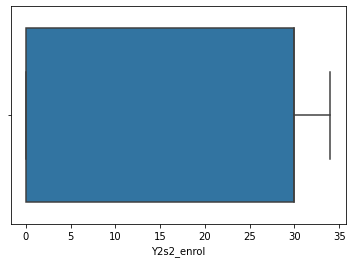

Y2s2_complete


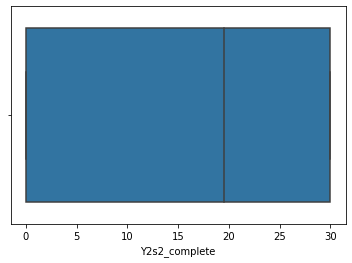

Y3s1_enrol


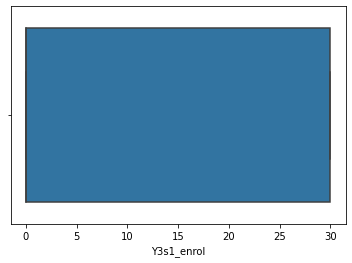

Y3s1_complete


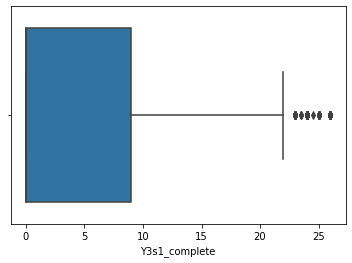

Y3s2_enrol


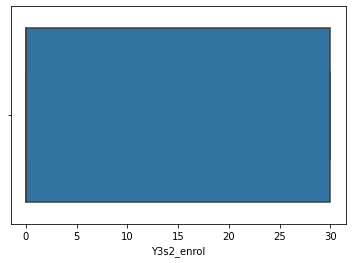

Y3s2_complete


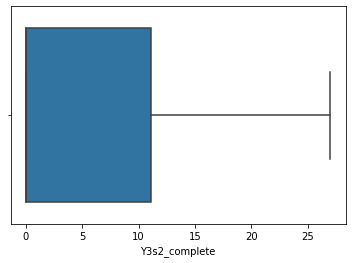

Y4s1_enrol


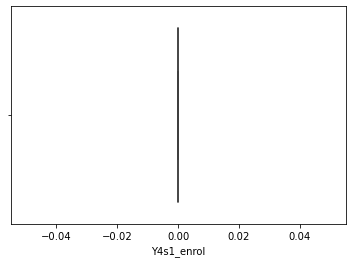

Y4s1_complete


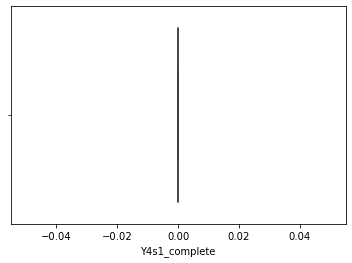

Y4s2_enrol


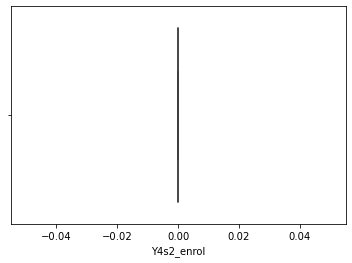

Y4s2_complete


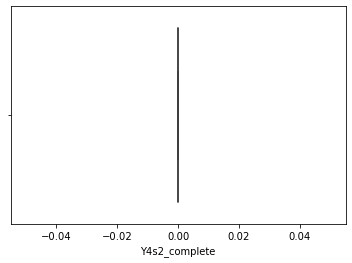

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
for a in colunas:          
    Q1 = dados2[a].quantile(0.25)
    Q3 = dados2[a].quantile(0.75)
#     print(Q1,Q3)

    filter = (dados2[a] >= Q1) & (dados2[a] <= Q3)
#     print(filter)
    dados_toplot[a]=dados2[a].loc[filter]
    print(a)
    sns.boxplot(dados_toplot[a])
    plt.show()

In [9]:
dados_toplot.dropna() #Tirariamos a maioria do dataset - manter outliers

,Id,Program,Y0s1_enrol,Y0s2_enrol,Y1s1_enrol,Y1s1_complete,Y1s1_grade,Y1s2_enrol,Y1s2_complete,Y1s2_grade,...,Y4s1_enrol,Y4s1_complete,Y4s1_grade,Y4s2_enrol,Y4s2_complete,Y4s2_grade,Rest_enrol,Rest_complete,Rest_grade,Failure
20,131382670,1,30.0,36.0,30.0,30.0,13.100,30.0,30.0,12.800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22,131379484,3,33.0,30.0,30.0,27.0,12.111,30.0,30.0,13.367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25,131388192,2,30.0,30.0,30.0,30.0,14.467,30.0,30.0,15.350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
64,131382910,3,30.0,30.0,30.0,30.0,15.700,30.0,30.0,15.333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
65,131386325,0,30.0,30.0,30.0,19.0,11.368,30.0,24.0,13.167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,131385007,2,30.0,30.0,30.0,30.0,14.500,30.0,30.0,16.600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2009,131389489,2,30.0,36.0,30.0,30.0,13.033,30.0,30.0,14.233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2052,131383541,2,30.0,33.0,30.0,30.0,11.900,30.0,27.0,12.556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2075,131379416,3,30.0,30.0,30.0,30.0,11.500,30.0,30.0,13.267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


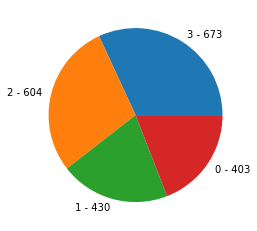

In [10]:
import matplotlib.pyplot as plt
import numpy as np
lis=[]
for e,x in zip(data['Program'].value_counts().index,data['Program'].value_counts().values):
    lis.append(str(e)+' - '+str(x))
y = np.array(data['Program'].value_counts().values)
mylabels = np.array(lis)

plt.pie(y, labels = mylabels)
plt.show() 

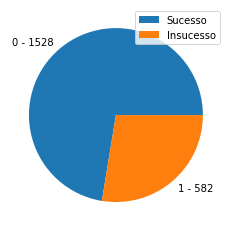

In [11]:
import matplotlib.pyplot as plt
import numpy as np
lis=[]
for e,x in zip(data['Failure'].value_counts().index,data['Failure'].value_counts().values):
    lis.append(str(e)+' - '+str(x))
y = np.array(data['Failure'].value_counts().values)
mylabels = np.array(lis)

plt.pie(y, labels = mylabels)
plt.legend(['Sucesso','Insucesso'])
plt.show() 

# Experiência 1 -Escolha do Modelo

In [12]:
Y=data['Failure']
X=data.drop(columns=['Failure'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [14]:
modelos_para_experimentar=[DecisionTreeClassifier(random_state=10),RandomForestClassifier(random_state=10),\
            ExtraTreesClassifier(random_state=1),GradientBoostingClassifier(random_state=10),\
            KNeighborsClassifier(),GaussianNB(),SVC(random_state=10)]

In [15]:
for clf in modelos_para_experimentar:
    clf.fit(X_train,y_train)    
    score_recall=cross_val_score(clf, X=X, y=Y, cv=5, scoring='recall').mean().round(3)
    score_prec=cross_val_score(clf, X=X, y=Y, cv=5, scoring='precision').mean().round(3)
    print('Média da Precisão dos Folds:',score_recall)
    print('Média do Recall dos Folds:',score_prec)
    y_pred=clf.predict(X_test)
    print(str(clf))
    print('Classification Report-Test\n',classification_report(y_test,y_pred))

Média da Precisão dos Folds: 0.899
Média do Recall dos Folds: 0.886
DecisionTreeClassifier(random_state=10)
Classification Report-Test
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       310
           1       0.83      0.90      0.87       112

    accuracy                           0.93       422
   macro avg       0.90      0.92      0.91       422
weighted avg       0.93      0.93      0.93       422

Média da Precisão dos Folds: 0.885
Média do Recall dos Folds: 0.95
RandomForestClassifier(random_state=10)
Classification Report-Test
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       310
           1       0.95      0.89      0.92       112

    accuracy                           0.96       422
   macro avg       0.96      0.94      0.95       422
weighted avg       0.96      0.96      0.96       422

Média da Precisão dos Folds: 0.869
Média do Recall dos Folds: 0.946
ExtraTr

### Experimentar uma rede neuronal

In [16]:
Y=data['Failure']
X=data.drop(columns=['Failure'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [17]:
mlp=MLPClassifier(hidden_layer_sizes=(128,16), verbose=True,activation='relu', solver='adam', learning_rate_init=0.1, shuffle=True, random_state=10, momentum=0.9)

In [18]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 14.92322585
Iteration 2, loss = 4.71956410
Iteration 3, loss = 0.59389388
Iteration 4, loss = 0.59705824
Iteration 5, loss = 0.59520041
Iteration 6, loss = 0.59277274
Iteration 7, loss = 0.59206297
Iteration 8, loss = 0.59198601
Iteration 9, loss = 0.59192344
Iteration 10, loss = 0.59188123
Iteration 11, loss = 0.59216291
Iteration 12, loss = 0.59203877
Iteration 13, loss = 0.59193306
Iteration 14, loss = 0.59192187
Iteration 15, loss = 0.59203880
Iteration 16, loss = 0.59190417
Iteration 17, loss = 0.59194604
Iteration 18, loss = 0.59207148
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(128, 16), learning_rate_init=0.1,
              random_state=10, verbose=True)

In [19]:
y_pred=mlp.predict(X_test)

In [20]:
recall_score(y_test.to_list(),y_pred)

0.0

### Avaliar o melhor modelo

In [21]:
Y=data['Failure']
X=data.drop(columns=['Failure'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [22]:
gb=GradientBoostingClassifier(random_state=10)

In [23]:
gb.fit(X_train,y_train) 

GradientBoostingClassifier(random_state=10)

In [24]:
y_pred=gb.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       310
           1       0.96      0.89      0.93       112

    accuracy                           0.96       422
   macro avg       0.96      0.94      0.95       422
weighted avg       0.96      0.96      0.96       422



In [26]:
recall_score(y_test,y_pred) #USAR PARA COMPARAR COM GRID SEARCH

0.8928571428571429

In [27]:
precision_score(y_test,y_pred) #maior que 70%

0.9615384615384616

# Experiência 2 - Otimização do Modelo

In [28]:
Y=data['Failure']
X=data.drop(columns=['Failure'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
parameters ={'learning_rate':[0.001,0.01,0.05,0.1], 'n_estimators':[50,100,200], 'max_depth':[1,2,3,4,5]}

In [29]:
grid=GridSearchCV(gb,parameters,scoring='recall',cv=5,verbose=3)

In [30]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=50;, score=0.000 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=100;, score=0.000 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=100;, score=0.000 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=100;, score=0.000 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=100;, score=0.000 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=100;, scor

[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=200;, score=0.755 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=200;, score=0.840 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=200;, score=0.862 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=200;, score=0.851 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=200;, score=0.872 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.681 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.755 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.787 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.809 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.798 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=2,

[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.862 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.862 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.926 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.926 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.894 total time=   0.4s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.862 total time=   0.4s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.872 total time=   0.4s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.926 total time=   0.4s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.947 total time=   0.4s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=50;, score=0.862 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_dept

[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.926 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.926 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.894 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.883 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.883 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.936 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.915 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.904 total time=   0.6s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.883 total time=   0.7s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.883 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estim

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=3)

In [31]:
y_pred=grid.predict(X_test)

In [32]:
precision_score(y_test,y_pred) #A precision piorou ligeiramente

0.9433962264150944

In [33]:
recall_score(y_test,y_pred) #Não há melhoria do recall, mantém-se

0.8928571428571429

In [34]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}

In [35]:
results_grid=pd.DataFrame()
results_gridcv=results_grid.from_dict(grid.cv_results_)
results_gridcv[results_gridcv.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,0.897992,0.018779,0.003403,0.000488,0.05,4,200,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.893617,0.882979,0.893617,0.946809,0.914894,0.906383,0.022717,1
47,0.278989,0.010683,0.002204,0.000398,0.1,1,200,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.893617,0.882979,0.893617,0.936170,0.925532,0.906383,0.020628,1


### Guardar o melhor modelo treinado com todo o conjunto de dados num pickle

In [36]:
Y=data['Failure']
X=data.drop(columns=['Failure'])
gb_topick=GradientBoostingClassifier(random_state=10)
gb_topick.fit(X,Y)
#pickle.dump(gb_topick,open('modelo','wb'))

GradientBoostingClassifier(random_state=10)

# Experiência 3 - Escolha das 2 variáveis

In [37]:
X_2par=X.copy()
y_2par=Y.copy()

## Método 1

In [38]:
lista=[]
while len(X_2par.columns)!=2:
    avals={}
    for e in X_2par.columns:
        data_vars=X_2par.copy()
        data_vars.drop(e, inplace=True, axis=1)
        avals[e]=cross_val_score(gb, X=data_vars, y=Y, cv=5, scoring='recall').mean().round(3)
    for t in avals.keys():
        if avals[t]==max(avals.values()):
            key=t
        
    X_2par.drop(key, inplace=True, axis=1)
    print('')
    print(avals)
    print('')
    
    print(key,avals[key])


{'Id': 0.88, 'Program': 0.9, 'Y0s1_enrol': 0.897, 'Y0s2_enrol': 0.899, 'Y1s1_enrol': 0.904, 'Y1s1_complete': 0.902, 'Y1s1_grade': 0.902, 'Y1s2_enrol': 0.902, 'Y1s2_complete': 0.899, 'Y1s2_grade': 0.905, 'Y2s1_enrol': 0.905, 'Y2s1_complete': 0.899, 'Y2s1_grade': 0.902, 'Y2s2_enrol': 0.904, 'Y2s2_complete': 0.888, 'Y2s2_grade': 0.905, 'Y3s1_enrol': 0.902, 'Y3s1_complete': 0.899, 'Y3s1_grade': 0.905, 'Y3s2_enrol': 0.902, 'Y3s2_complete': 0.897, 'Y3s2_grade': 0.902, 'Y4s1_enrol': 0.904, 'Y4s1_complete': 0.897, 'Y4s1_grade': 0.902, 'Y4s2_enrol': 0.899, 'Y4s2_complete': 0.9, 'Y4s2_grade': 0.899, 'Rest_enrol': 0.904, 'Rest_complete': 0.902, 'Rest_grade': 0.899}

Y3s1_grade 0.905

{'Id': 0.874, 'Program': 0.9, 'Y0s1_enrol': 0.9, 'Y0s2_enrol': 0.9, 'Y1s1_enrol': 0.9, 'Y1s1_complete': 0.904, 'Y1s1_grade': 0.9, 'Y1s2_enrol': 0.902, 'Y1s2_complete': 0.899, 'Y1s2_grade': 0.902, 'Y2s1_enrol': 0.904, 'Y2s1_complete': 0.902, 'Y2s1_grade': 0.9, 'Y2s2_enrol': 0.904, 'Y2s2_complete': 0.89, 'Y2s2_grade':


{'Id': 0.881, 'Y0s1_enrol': 0.899, 'Y0s2_enrol': 0.904, 'Y1s1_enrol': 0.895, 'Y1s1_complete': 0.902, 'Y1s1_grade': 0.905, 'Y1s2_complete': 0.902, 'Y1s2_grade': 0.905, 'Y2s1_complete': 0.902, 'Y2s1_grade': 0.9, 'Y2s2_complete': 0.89, 'Y3s2_complete': 0.899, 'Y4s2_enrol': 0.902, 'Y4s2_grade': 0.907, 'Rest_enrol': 0.902}

Y4s2_grade 0.907

{'Id': 0.869, 'Y0s1_enrol': 0.897, 'Y0s2_enrol': 0.9, 'Y1s1_enrol': 0.895, 'Y1s1_complete': 0.902, 'Y1s1_grade': 0.902, 'Y1s2_complete': 0.899, 'Y1s2_grade': 0.895, 'Y2s1_complete': 0.897, 'Y2s1_grade': 0.9, 'Y2s2_complete': 0.885, 'Y3s2_complete': 0.904, 'Y4s2_enrol': 0.897, 'Rest_enrol': 0.895}

Y3s2_complete 0.904

{'Id': 0.866, 'Y0s1_enrol': 0.893, 'Y0s2_enrol': 0.897, 'Y1s1_enrol': 0.888, 'Y1s1_complete': 0.895, 'Y1s1_grade': 0.902, 'Y1s2_complete': 0.899, 'Y1s2_grade': 0.9, 'Y2s1_complete': 0.899, 'Y2s1_grade': 0.892, 'Y2s2_complete': 0.88, 'Y4s2_enrol': 0.897, 'Rest_enrol': 0.893}

Y1s1_grade 0.902

{'Id': 0.874, 'Y0s1_enrol': 0.893, 'Y0s2_enrol

#### Melhores variáveis: 'Id','Y2s2_complete'

### Avaliar o modelo com as 2 melhores variáveis

In [39]:
Y=data['Failure']
X=data.drop(columns=['Failure'])
X_train, X_test, y_train, y_test = train_test_split(X[['Id','Y2s2_complete']], Y, test_size=0.20, random_state=42)

In [40]:
gb_2vars=GradientBoostingClassifier(random_state=10)

In [41]:
gb_2vars.fit(X_train,y_train)

GradientBoostingClassifier(random_state=10)

In [42]:
y_pred=gb_2vars.predict(X_test)

In [43]:
recall_score(y_test,y_pred),precision_score(y_test,y_pred)

(0.8571428571428571, 0.8648648648648649)

## Método 2

In [44]:
Y=data['Failure']
X=data.drop(columns=['Failure'])
Y_Comb=Y.copy()
X_Comb=X.copy()
test_list=X_Comb.columns
gb=GradientBoostingClassifier(random_state=10)
# print("The original list : " + str(test_list))
  
res = [[a, b] for idx, a in enumerate(test_list) for b in test_list[idx + 1:]]
  
# print("All possible pairs : " + str(res))
maxiu=0
lista=[]
for e in res:
    X_semvars=X_Comb[e]
    score_recall=cross_val_score(gb, X=X_semvars, y=Y_Comb, cv=5, scoring='recall').mean().round(3)
    lista.append([e,score_recall])
    if score_recall>maxiu:
        maxiu=score_recall
        print(e)
        print(maxiu)

['Id', 'Program']
0.345
['Id', 'Y0s1_enrol']
0.356
['Id', 'Y1s1_enrol']
0.567
['Id', 'Y1s1_complete']
0.801
['Id', 'Y1s2_complete']
0.842
['Id', 'Y2s2_complete']
0.856
['Y2s1_enrol', 'Y2s2_complete']
0.88
['Y2s1_complete', 'Y2s2_complete']
0.892
['Y2s2_complete', 'Y4s2_complete']
0.897


#### Melhores variáveis:

In [45]:
maxiu=lista[0][1]
for e in lista:
    if e[1]>maxiu:
        maxiu=e[1]
        maxi=e
maxi

[['Y2s2_complete', 'Y4s2_complete'], 0.897]

#### Selécionamos as variáveis obtidas com o método 2, pois é o modelo que apresenta melhor performance: 'Y2s2_complete', 'Y4s2_complete'

### Avaliar o modelo com as 2 melhores variáveis

In [47]:
Y=data['Failure']
X=data.drop(columns=['Failure'])
X_train, X_test, y_train, y_test = train_test_split(X[['Y2s2_complete', 'Y4s2_complete']], Y, test_size=0.20, random_state=42)

In [48]:
gb_2=GradientBoostingClassifier(random_state=10)

In [49]:
gb_2.fit(X_train,y_train)

GradientBoostingClassifier(random_state=10)

In [50]:
y_pred=gb_2.predict(X_test)

In [51]:
recall_score(y_test,y_pred),precision_score(y_test,y_pred)

(0.9107142857142857, 0.6938775510204082)

# Experiência 4 - Otimização do Modelo com as 2 variáveis selecionadas


In [52]:
Y=data['Failure']
X=data.drop(columns=['Failure'])[['Y2s2_complete', 'Y4s2_complete']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
parameters={'learning_rate':[0.01,0.05,0.1],'n_estimators':[50,75,100,150,200,300,400],'max_depth':[1,2,3,4,5]}

In [53]:
gb_2otim=GradientBoostingClassifier(random_state=10)

In [54]:
grid_2=GridSearchCV(gb_2otim,parameters,scoring='recall',cv=5,verbose=3)

In [55]:
grid_2.fit(X_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.000 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=75;, score=0.883 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=75;, score=0.894 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=75;, score=0.798 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=75;, score=0.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=75;, score=0.000 total 

[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=150;, score=0.872 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=150;, score=0.830 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=150;, score=0.915 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=150;, score=0.926 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.872 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.872 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.830 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.915 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.926 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.872 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_dep

[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=400;, score=0.851 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=400;, score=0.926 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=400;, score=0.957 total time=   0.3s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.883 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.894 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.894 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.915 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.926 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=75;, score=0.883 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=75;, score=0.894 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=1, n

[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.936 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=150;, score=0.851 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=150;, score=0.872 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=150;, score=0.830 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=150;, score=0.915 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=150;, score=0.936 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=200;, score=0.851 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=200;, score=0.872 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=200;, score=0.851 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=200;, score=0.915 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_dep

[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=400;, score=0.872 total time=   0.4s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=400;, score=0.872 total time=   0.3s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=400;, score=0.862 total time=   0.3s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=400;, score=0.915 total time=   0.3s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=400;, score=0.947 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=0.883 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=0.894 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=0.851 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=0.915 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=0.926 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_est

[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.957 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.851 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.872 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.851 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.915 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.957 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.851 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.872 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.851 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.915 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_est

[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=400;, score=0.894 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=400;, score=0.851 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=400;, score=0.915 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=400;, score=0.947 total time=   0.3s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 75, 100, 150, 200, 300, 400]},
             scoring='recall', verbose=3)

In [56]:
y_pred=grid_2.predict(X_test)

In [57]:
precision_score(y_test,y_pred)

0.6776315789473685

In [58]:
recall_score(y_test,y_pred)

0.9196428571428571

In [59]:
grid_2.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [60]:
results_grid2=pd.DataFrame()
results_gridcv2=results_grid2.from_dict(grid_2.cv_results_)
results_gridcv2[results_gridcv2.rank_test_score==4]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
61,0.249793,0.003544,0.003009,0.000014,0.05,4,300,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.87234,0.893617,0.851064,0.914894,0.946809,0.895745,0.033235,4
95,0.179192,0.006008,0.003006,0.001096,0.1,4,200,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.87234,0.893617,0.851064,0.914894,0.946809,0.895745,0.033235,4
101,0.161807,0.002570,0.003193,0.000398,0.1,5,150,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.87234,0.893617,0.851064,0.914894,0.946809,0.895745,0.033235,4
102,0.216994,0.007282,0.003602,0.000803,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.87234,0.893617,0.851064,0.914894,0.946809,0.895745,0.033235,4
103,0.323601,0.004397,0.003600,0.000799,0.1,5,300,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.87234,0.893617,0.851064,0.914894,0.946809,0.895745,0.033235,4
104,0.422407,0.008900,0.004000,0.000014,0.1,5,400,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.87234,0.893617,0.851064,0.914894,0.946809,0.895745,0.033235,4


In [61]:
for e in set(results_gridcv2.rank_test_score):
    for ind in results_gridcv2[results_gridcv2.rank_test_score==e].index:
        gb_opt=GradientBoostingClassifier(random_state=10,learning_rate=results_gridcv2.iloc[ind].param_learning_rate,n_estimators=results_gridcv2.iloc[ind].param_n_estimators,max_depth=results_gridcv2.iloc[ind].param_max_depth)
        gb_opt.fit(X_train,y_train)
        y_pred=gb_opt.predict(X_test)
        print(ind)
        print('p',precision_score(y_test,y_pred),precision_score(y_test,y_pred)>=0.7)
        print('r',recall_score(y_test,y_pred))

3
p 0.6776315789473685 False
r 0.9196428571428571
4
p 0.6776315789473685 False
r 0.9196428571428571
35
p 0.6776315789473685 False
r 0.9196428571428571
61
p 0.6733333333333333 False
r 0.9017857142857143
95
p 0.6802721088435374 False
r 0.8928571428571429
101
p 0.684931506849315 False
r 0.8928571428571429
102
p 0.684931506849315 False
r 0.8928571428571429
103
p 0.684931506849315 False
r 0.8928571428571429
104
p 0.684931506849315 False
r 0.8928571428571429
58
p 0.6938775510204082 False
r 0.9107142857142857
59
p 0.6778523489932886 False
r 0.9017857142857143
60
p 0.6733333333333333 False
r 0.9017857142857143
68
p 0.6824324324324325 False
r 0.9017857142857143
69
p 0.6802721088435374 False
r 0.8928571428571429
5
p 0.6776315789473685 False
r 0.9196428571428571
6
p 0.6821192052980133 False
r 0.9196428571428571
33
p 0.6845637583892618 False
r 0.9107142857142857
34
p 0.6845637583892618 False
r 0.9107142857142857
36
p 0.6821192052980133 False
r 0.9196428571428571
37
p 0.6866666666666666 False
r 0.9

#### O conjunto de parâmetros com maior cobertura e uma precissão mínima é o index 83 então o index escolhido 83

In [62]:
results_gridcv2.iloc[83]

mean_fit_time                                                   0.198405
std_fit_time                                                    0.004964
mean_score_time                                                 0.002794
std_score_time                                                  0.000397
param_learning_rate                                                  0.1
param_max_depth                                                        2
param_n_estimators                                                   400
params                 {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...
split0_test_score                                               0.851064
split1_test_score                                                0.87234
split2_test_score                                               0.851064
split3_test_score                                               0.914894
split4_test_score                                               0.957447
mean_test_score                                    

### Avaliar o melhor modelo com 2 variáveis

In [63]:
Y=data['Failure']
X=data.drop(columns=['Failure'])[['Y2s2_complete', 'Y4s2_complete']]

In [64]:
gb_best2=GradientBoostingClassifier(random_state=10,learning_rate=0.1,n_estimators=400,max_depth=2)

In [65]:
gb_best2.fit(X_train,y_train) 

GradientBoostingClassifier(max_depth=2, n_estimators=400, random_state=10)

In [66]:
y_pred=gb_best2.predict(X_test)

In [67]:
precision_score(y_test,y_pred)

0.7006802721088435

In [68]:
recall_score(y_test,y_pred)

0.9196428571428571

In [69]:
Y=data['Failure']
X=data.drop(columns=['Failure'])[['Y2s2_complete', 'Y4s2_complete']]
gb_topick_2=GradientBoostingClassifier(random_state=10,learning_rate=0.1,n_estimators=400,max_depth=2)
gb_topick_2.fit(X,Y)
# pickle.dump(gb_topick_2,open('modelo_2','wb'))

GradientBoostingClassifier(max_depth=2, n_estimators=400, random_state=10)

# Ficamos assim com um modelo com 91% de cobertura e os 70% de precisão

# 